# Workflow
0. Motivation 
1. Define Problem
2. Load data
3. Data Cleaning
4. EDA
5. Modeling Building
6. Evaluation

## Motivation

In the near future, I would like to own few properties and get rents from tenents to generate passive income. In order to do make that happens, I need to buy a "good" property. Therefore, while analyzing data and building model, I want to gain domain knowledge of the housing price.

Secondly, I am eager to apply various regression models that I have learned from my classes. I believe while practicing the regression methods on the real data, I will gain REAL Knowledge.

## Define Problem
> Predict sales prices of houses based on the given dataset

In [1]:
# data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
train_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
combine = [train_df, test_df]

In [3]:
# we have 1,460 datapoint with 81 variables for train dataset
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Cleaning

<AxesSubplot:>

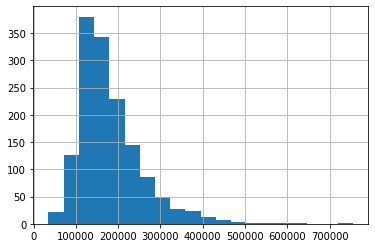

In [5]:
# let's see the distribution of the target variable itself
train_df['SalePrice'].hist(bins = 20)

**Skewness**

In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

Consider the two distributions in the figure just below. Within each graph, the values on the right side of the distribution taper differently from the values on the left side. These tapering sides are called tails, and they provide a visual means to determine which of the two kinds of skewness a distribution has:

negative skew: The left tail is longer; the mass of the distribution is concentrated on the right of the figure. The distribution is said to be left-skewed, left-tailed, or skewed to the left, despite the fact that the curve itself appears to be skewed or leaning to the right; left instead refers to the left tail being drawn out and, often, the mean being skewed to the left of a typical center of the data. A left-skewed distribution usually appears as a right-leaning curve.

positive skew: The right tail is longer; the mass of the distribution is concentrated on the left of the figure. The distribution is said to be right-skewed, right-tailed, or skewed to the right, despite the fact that the curve itself appears to be skewed or leaning to the left; right instead refers to the right tail being drawn out and, often, the mean being skewed to the right of a typical center of the data. A right-skewed distribution usually appears as a left-leaning curve.

Definition

Fisher's moment coefficient of skewness
The skewness of a random variable X is the third standardized moment ${\displaystyle {\tilde {\mu }}_{3}}{\displaystyle {\tilde {\mu }}_{3}}$, defined as:[4][5]

${\displaystyle {\tilde {\mu }}_{3}=\operatorname {E} \left[\left({\frac {X-\mu }{\sigma }}\right)^{3}\right]={\frac {\mu _{3}}{\sigma ^{3}}}={\frac {\operatorname {E} \left[(X-\mu )^{3}\right]}{(\operatorname {E} \left[(X-\mu )^{2}\right])^{3/2}}}={\frac {\kappa _{3}}{\kappa _{2}^{3/2}}}}{\displaystyle {\tilde {\mu }}_{3}=\operatorname {E} \left[\left({\frac {X-\mu }{\sigma }}\right)^{3}\right]={\frac {\mu _{3}}{\sigma ^{3}}}={\frac {\operatorname {E} \left[(X-\mu )^{3}\right]}{(\operatorname {E} \left[(X-\mu )^{2}\right])^{3/2}}}={\frac {\kappa _{3}}{\kappa _{2}^{3/2}}}}$
where μ is the mean, σ is the standard deviation, E is the expectation operator, μ3 is the third central moment, and κt are the t-th cumulants. It is sometimes referred to as Pearson's moment coefficient of skewness,[5] or simply the moment coefficient of skewness,[4] but should not be confused with Pearson's other skewness statistics (see below). The last equality expresses skewness in terms of the ratio of the third cumulant κ3 to the 1.5th power of the second cumulant κ2. This is analogous to the definition of kurtosis as the fourth cumulant normalized by the square of the second cumulant. The skewness is also sometimes denoted Skew[X].

If σ is finite, μ is finite too and skewness can be expressed in terms of the non-central moment E[X3] by expanding the previous formula,

${\displaystyle {\begin{aligned}{\tilde {\mu }}_{3}&=\operatorname {E} \left[\left({\frac {X-\mu }{\sigma }}\right)^{3}\right]\\&={\frac {\operatorname {E} [X^{3}]-3\mu \operatorname {E} [X^{2}]+3\mu ^{2}\operatorname {E} [X]-\mu ^{3}}{\sigma ^{3}}}\\&={\frac {\operatorname {E} [X^{3}]-3\mu (\operatorname {E} [X^{2}]-\mu \operatorname {E} [X])-\mu ^{3}}{\sigma ^{3}}}\\&={\frac {\operatorname {E} [X^{3}]-3\mu \sigma ^{2}-\mu ^{3}}{\sigma ^{3}}}.\end{aligned}}}{\displaystyle {\begin{aligned}{\tilde {\mu }}_{3}&=\operatorname {E} \left[\left({\frac {X-\mu }{\sigma }}\right)^{3}\right]\\&={\frac {\operatorname {E} [X^{3}]-3\mu \operatorname {E} [X^{2}]+3\mu ^{2}\operatorname {E} [X]-\mu ^{3}}{\sigma ^{3}}}\\&={\frac {\operatorname {E} [X^{3}]-3\mu (\operatorname {E} [X^{2}]-\mu \operatorname {E} [X])-\mu ^{3}}{\sigma ^{3}}}\\&={\frac {\operatorname {E} [X^{3}]-3\mu \sigma ^{2}-\mu ^{3}}{\sigma ^{3}}}.\end{aligned}}}$

Applications

Skewness is a descriptive statistic that can be used in conjunction with the histogram and the normal quantile plot to characterize the data or distribution.Skewness indicates the direction and relative magnitude of a distribution's deviation from the normal distribution.With pronounced skewness, standard statistical inference procedures such as a confidence interval for a mean will be not only incorrect, in the sense that the true coverage level will differ from the nominal (e.g., 95%) level, but they will also result in unequal error probabilities on each side. Many models assume normal distribution; i.e., data are symmetric about the mean. The normal distribution has a skewness of zero. But in reality, data points may not be perfectly symmetric. So, an understanding of the skewness of the dataset indicates whether deviations from the mean are going to be positive or negative.

(+add how to calculate skewness and why it is important)
https://en.wikipedia.org/wiki/Skewness

**kurtosis**

In probability theory and statistics, kurtosis (from Greek: κυρτός, kyrtos or kurtos, meaning "curved, arching") is a measure of the "tailedness" of the probability distribution of a real-valued random variable. Like skewness, kurtosis describes the shape of a probability distribution and there are different ways of quantifying it for a theoretical distribution and corresponding ways of estimating it from a sample from a population. Different measures of kurtosis may have different interpretations.

The kurtosis is the fourth standardized moment, defined as

${\displaystyle \operatorname {Kurt} [X]=\operatorname {E} \left[\left({\frac {X-\mu }{\sigma }}\right)^{4}\right]={\frac {\operatorname {E} \left[(X-\mu )^{4}\right]}{\left(\operatorname {E} \left[(X-\mu )^{2}\right]\right)^{2}}}={\frac {\mu _{4}}{\sigma ^{4}}},}{\displaystyle \operatorname {Kurt} [X]=\operatorname {E} \left[\left({\frac {X-\mu }{\sigma }}\right)^{4}\right]={\frac {\operatorname {E} \left[(X-\mu )^{4}\right]}{\left(\operatorname {E} \left[(X-\mu )^{2}\right]\right)^{2}}}={\frac {\mu _{4}}{\sigma ^{4}}},}$

where μ4 is the fourth central moment and σ is the standard deviation. Several letters are used in the literature to denote the kurtosis. A very common choice is κ, which is fine as long as it is clear that it does not refer to a cumulant. Other choices include γ2, to be similar to the notation for skewness, although sometimes this is instead reserved for the excess kurtosis.

The kurtosis is bounded below by the squared skewness plus 1

${\displaystyle {\frac {\mu _{4}}{\sigma ^{4}}}\geq \left({\frac {\mu _{3}}{\sigma ^{3}}}\right)^{2}+1,} \frac{\mu_4}{\sigma^4} \geq \left(\frac{\mu_3}{\sigma^3}\right)^2 + 1,$
where μ3 is the third central moment. The lower bound is realized by the Bernoulli distribution. There is no upper limit to the kurtosis of a general probability distribution, and it may be infinite.

https://en.wikipedia.org/wiki/Kurtosis

In [6]:
print(f"skewness of the train df is {train_df['SalePrice'].skew()}")
print(f"kurtosis of the train df is {train_df['SalePrice'].kurtosis()}")

skewness of the train df is 1.8828757597682129
kurtosis of the train df is 6.536281860064529


array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

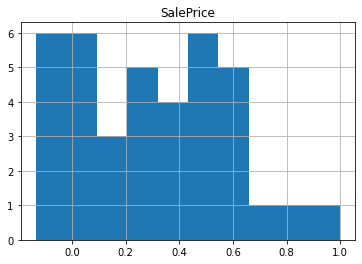

In [7]:
# check the correlation histogram
# correlation 0.4 seems to be a proper place to split

corr_vec = pd.DataFrame(train_df.corr()['SalePrice'])
corr_vec.hist()

We first want to choose columns that has high correlation(>0.4) with target variable and clean the data. 

<AxesSubplot:>

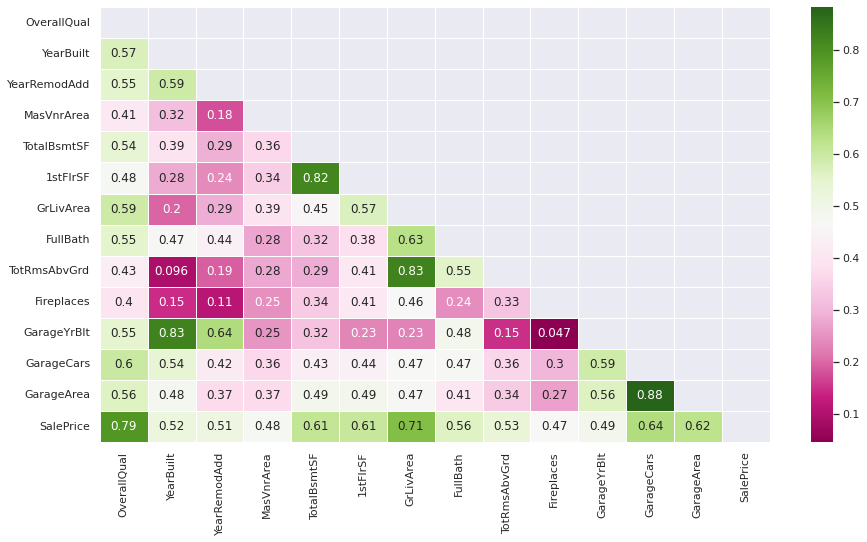

In [8]:
sns.set(rc = {'figure.figsize':(15,8)})
matrix = np.triu(train_df[corr_vec[corr_vec['SalePrice'] > 0.4].index].corr())
sns.heatmap(train_df[corr_vec[corr_vec['SalePrice'] > 0.4].index].corr(), annot=True,linewidth=.8, mask=matrix, cmap='PiYG')

In [9]:
corr_df = pd.DataFrame(train_df[corr_vec[corr_vec['SalePrice'] > 0.4].index].corr()['SalePrice'])
corr_df.sort_values(by = 'SalePrice', ascending = False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


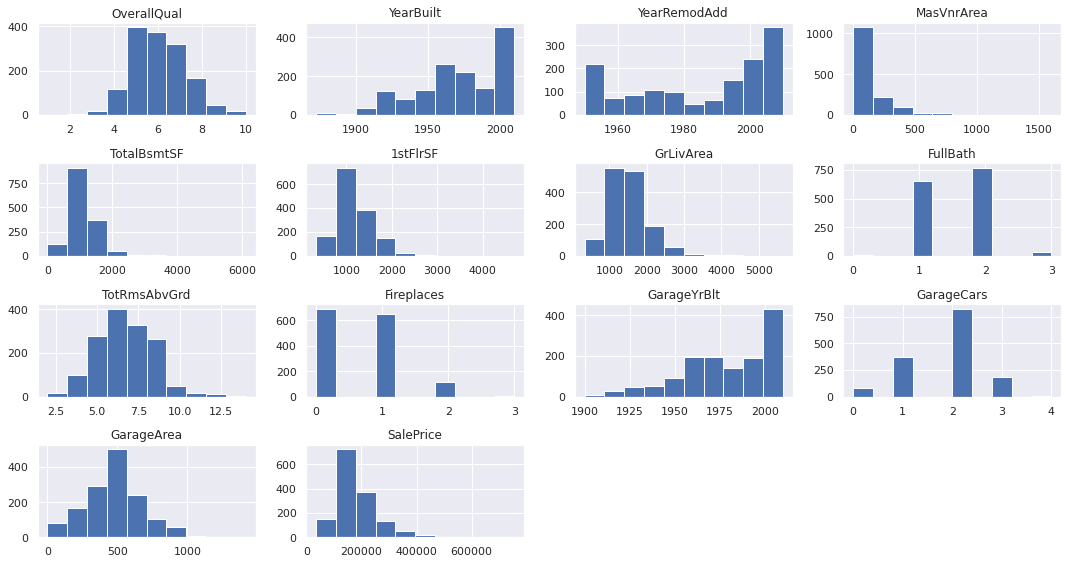

In [10]:
train_df[corr_vec[corr_vec['SalePrice'] > 0.4].index].hist()
plt.tight_layout()

<AxesSubplot:>

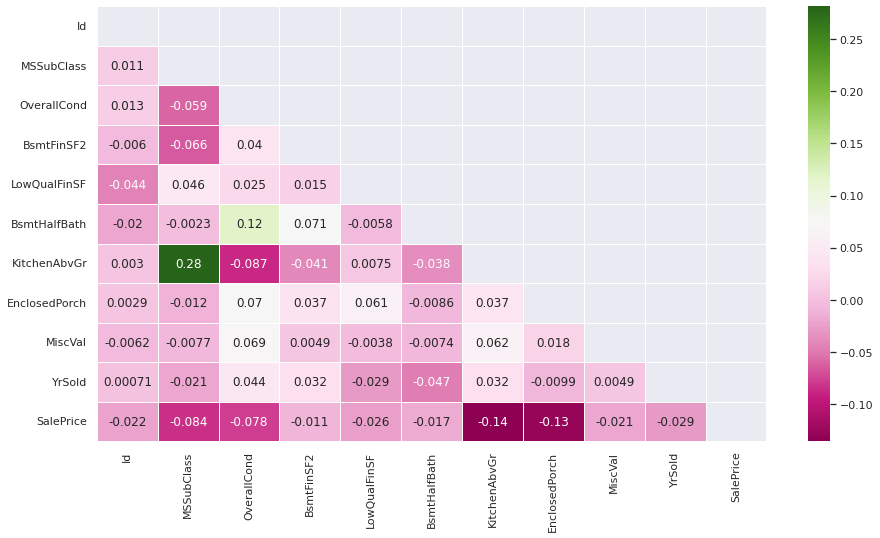

In [11]:

neg_vec = list(corr_vec[corr_vec['SalePrice'] < 0].index)
neg_vec.append('SalePrice')

sns.set(rc = {'figure.figsize':(15,8)})
matrix = np.triu(train_df[neg_vec].corr())
sns.heatmap(train_df[neg_vec].corr(), annot=True,linewidth=.8, mask=matrix, cmap='PiYG')